## Exercise-09
## Index No - 190621M
## Name - K. Thanushan

### Question 1. and 2.

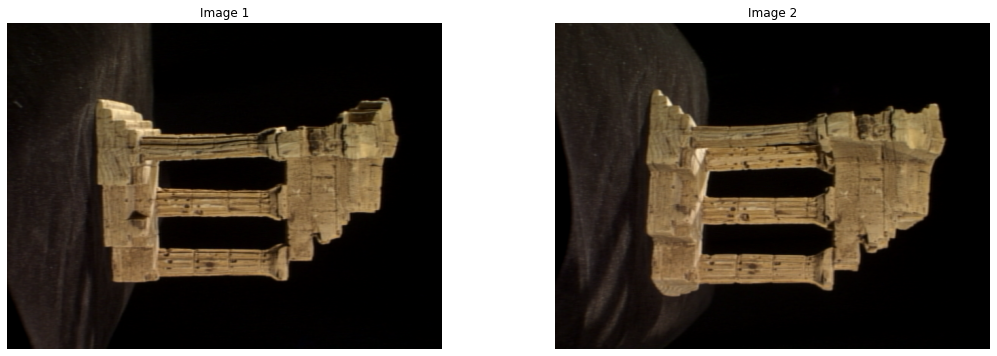

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.linalg import null_space

f = open(r'./templeSparseRing/templeSR_par.txt', 'r')
assert f is not None
n = int(f.readline())

# Reading the information on the first image
l = f.readline().split()
im1_fn = l[0]
K1 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R1 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t1 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

# Reading the information on the second image
l = f.readline().split()
im2_fn = l[0]
K2 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R2 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t2 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

#Read the two images and show
im1 = cv.imread(r'./templeSparseRing/' + im1_fn, cv.IMREAD_COLOR)
im2 = cv.imread(r'./templeSparseRing/' + im2_fn, cv.IMREAD_COLOR)
assert im1 is not None
assert im2 is not None
fig, ax = plt.subplots(1,2, figsize = (18,6))
Imageplot = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
ax[0].imshow(Imageplot)
ax[0].set_title('Image 1')
ax[0].axis('off')
Imageplot2 = cv.cvtColor(im2, cv.COLOR_BGR2RGB)
ax[1].imshow(Imageplot2)
ax[1].set_title('Image 2')
ax[1].axis('off')
plt.show()


In [11]:
sift = cv.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(im1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(im2, None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=100)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(descriptors_1, descriptors_2,k=2)

good = []
points1 = []
points2 = []

for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        good.append(m)
        points1.append(keypoints_1[m.queryIdx].pt)
        points2.append(keypoints_2[m.trainIdx].pt)

points1 = np.array(points1)
points2 = np.array(points2)
F, mask = cv.findFundamentalMat(points1,points2,cv.FM_LMEDS) #F is the fundamental matrix

E = K2.T@F@K1 #Essential Matrix

print('Fundamental Matrix = ', F ,'\n')
print('Essential Matrix = ', E)


((<DMatch 00000138A90E18F0>, <DMatch 00000138A90E1410>), (<DMatch 00000138A90E09F0>, <DMatch 00000138A90E0130>), (<DMatch 00000138A90E0AD0>, <DMatch 00000138A90E1490>), (<DMatch 00000138A90E01B0>, <DMatch 00000138A90E0430>), (<DMatch 00000138A90E0990>, <DMatch 00000138A90E0950>), (<DMatch 00000138A90E08F0>, <DMatch 00000138A90E0830>), (<DMatch 00000138A90E1CB0>, <DMatch 00000138A90E0B30>), (<DMatch 00000138A90E0C50>, <DMatch 00000138A90E0D10>), (<DMatch 00000138A90E0DD0>, <DMatch 00000138A90E0E90>), (<DMatch 00000138A90E0E70>, <DMatch 00000138A90E0ED0>), (<DMatch 00000138A90E1150>, <DMatch 00000138A90E10B0>), (<DMatch 00000138A90E13B0>, <DMatch 00000138A90E1450>), (<DMatch 00000138A90E1270>, <DMatch 00000138A90E1590>), (<DMatch 00000138A90E1750>, <DMatch 00000138A90E1770>), (<DMatch 00000138A90E1910>, <DMatch 00000138A90E17D0>), (<DMatch 00000138A90E1990>, <DMatch 00000138A90E1930>), (<DMatch 00000138A90E1BD0>, <DMatch 00000138A90E1AD0>), (<DMatch 00000138A90E1C70>, <DMatch 00000138A90

### Question 3.

In [9]:
retval, R, t, mask = cv.recoverPose(E, points1, points2, K1)
print('R = ', R ,'\n')
print('t = ', t)

R =  [[ 0.99857351 -0.05175978 -0.0131103 ]
 [ 0.05295385  0.92854465  0.36742444]
 [-0.00684431 -0.36759455  0.92996097]] 

t =  [[ 0.02208356]
 [-0.98394267]
 [ 0.17711337]]


### Question 4.

In [10]:
R_t_1 = np.concatenate((R1, t1), axis = 1) #3x4
R_t_2 = np.empty((3,4))
R2_ = R1 @ R
t2_ = R1@t
R_t_2 = np.concatenate((R2_, t2_), axis = 1) 

P1 = K1@np.hstack((R1, t1)) #First camera's matrix read from data file
P2_ = K2@R_t_2 #Second camera's matrix estimated using the the fundamental matrix calculated using point matches.
print('Camera Matrix P_2 = ', P2_)

Camera Matrix P_2 =  [[ 1.28128731e+02  1.54485822e+03 -3.10821081e+00 -1.51717444e+03]
 [ 1.53129943e+03 -7.90862698e+01 -1.95404799e+02  6.81366127e+01]
 [ 4.58766110e-02  1.89916185e-01 -9.80727882e-01  5.77690550e-03]]


### Question 5.

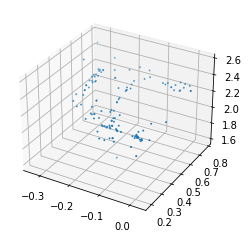

In [5]:
points4d = cv.triangulatePoints(P1, P2_, points1.T, points2.T)
points4d /= points4d[3, :]
X = points4d[0, :]
Y = points4d[1, :]
Z = points4d[2, :]

fig = plt.figure(1)
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X, Y, Z, s=1, cmap = 'gray')
plt.show()
